<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Laboratorio - Árboles de decisión, reglas y ensemble learning</h1></center>

<b>Juan David Escobar Escobar.</b></br>
* Diciembre 2021.
* Grupo 14.

## EDA - Exploración de datos</h2>

### importar librerias e inicializar variables globales

Como uso una laptop Mac, deben añadirse las dos líneas siguientes para importar correctamente ficheros de forma segura.

In [564]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [565]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
import pandas as pd

from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

import seaborn as sns
from seaborn import lmplot

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn import tree

import plotly.graph_objs as go
import plotly.offline as py

import pydotplus

import numpy

from scipy import stats

from mlxtend.plotting import plot_decision_regions

import os

### Cargar dataset en memoria

In [566]:
nombre_data_set = "Laboratorio_dataset_car.csv"
encoding = 'utf8'

In [567]:
dataset = read_csv(nombre_data_set, sep=';', encoding=encoding, header='infer')

### Fase exploratoria de los datos

In [568]:
# -------------------------------------------------------------------
# Visualizamos los primeros 5 registros del dataset para asimilar los 
# datos contenidos en cada variable del dataset.
# -------------------------------------------------------------------

dataset.head(5)

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [569]:
# -------------------------------------------------------------------
# Como resultado la propiedad shape del dataset nos retorna una tupla
# indicandonos el número de filas y de columnas o en terminos de la
# materia/tema, numero de instancias, atributos y clases.
# -------------------------------------------------------------------

print(dataset.shape)

(1750, 7)


In [570]:
# -------------------------------------------------------------------
# Cantidad de valores por cada clase.
# -------------------------------------------------------------------

print(dataset.groupby('class').size())

class
acc       390
good       75
unacc    1215
vgood      70
dtype: int64


In [571]:
# -------------------------------------------------------------------
# Obtendremos una descripción básica de los datos almacenados en cada
# variable, podemos analizar caracteristicas tales como:
#   -Cantidad de registros o instancias.
#   -Cantidad de valores unicos. 
#   -El top o valor mas repetido. 
#   -La frecuencia o número de veces que se  repite el valor.
#
# En el resultado obtenido tambien evidenciamos que no hay valores 
# nulos (dataset.isnull().sum()).
# -------------------------------------------------------------------


print(dataset.describe(), '\n', '-'*60)
print(dataset.isnull().sum())

       Buying Maintenance Doors Person lug_boot safety  class
count    1750        1750  1750   1750     1750   1750   1750
unique      4           4     4      3        3      3      4
top     vhigh         low     2      4      big   high  unacc
freq      443         447   444    587      585    590   1215 
 ------------------------------------------------------------
Buying         0
Maintenance    0
Doors          0
Person         0
lug_boot       0
safety         0
class          0
dtype: int64


In [572]:
# -------------------------------------------------------------------
# Esta instrucción nos brinda un poco mas de información para cada 
# una de las variables del dataset, en este caso podemos observar 
# el tipo de dato asociado al esquema y tipos de datos inferidos por el 
# metodo de la libreria pandas read_csv.
# -------------------------------------------------------------------

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Buying       1750 non-null   object
 1   Maintenance  1750 non-null   object
 2   Doors        1750 non-null   object
 3   Person       1750 non-null   object
 4   lug_boot     1750 non-null   object
 5   safety       1750 non-null   object
 6   class        1750 non-null   object
dtypes: object(7)
memory usage: 95.8+ KB
None


A continuación se valida la distribución y los valores atipicos de cada variable, para porteriormente validar el factor común de los tipos de datos y asi ajustar los tipos de datos (cualitativos y cuantitativos) en caso de que sea necesario. 

In [573]:
print(dataset.nunique())

Buying         4
Maintenance    4
Doors          4
Person         3
lug_boot       3
safety         3
class          4
dtype: int64


In [574]:
def obtener_conteo_valores_unicos_col(dataset):
    """
    Esta función Validar el tipo de dato que mas se 
    ajusta a cada variable según los valores 
    almacenados.
    Parameters
    ----------
    dataset : pandas.dataframe
    Corresponde al dataset cargado en memoria a partir
    de la lectura del CSV.
    
    Return
    ------
    
    Precondition
    ------------
    
    Example
    -------
    >>> obtener_conteo_valores_unicos_col(dataset)
    print(group by count() for each col)
    """
    
    lista_cols = list(dataset.columns.values)
    
    for val in lista_cols:
        print(dataset.groupby(val).size())
        print('-'*12)         
           
obtener_conteo_valores_unicos_col(dataset)

Buying
high     432
low      437
med      438
vhigh    443
dtype: int64
------------
Maintenance
high     432
low      447
med      434
vhigh    437
dtype: int64
------------
Doors
2        444
3        435
4        434
5more    437
dtype: int64
------------
Person
2       578
4       587
more    585
dtype: int64
------------
lug_boot
big      585
med      583
small    582
dtype: int64
------------
safety
high    590
low     578
med     582
dtype: int64
------------
class
acc       390
good       75
unacc    1215
vgood      70
dtype: int64
------------


A continuaón se muestra una tabla con el resumen del valor de la frecuencia de cada valor almacenado en cada variable
y si son de tipo (cualitativo o cualtitativo), catalogamos la variables de la siguiente manera:

Evaluación de aceptabilidad del cliente en automóviles que utilizan clasificación


<ul>
    <li>Cuntitativos:
        <ul>
            <li>Discretos (el número de hijos por mujer).</li>
            <li>Continuos (la longitud del pétalo de una flor).</li>
        </ul>
    </li>
    <li>Cualitativos:
        <ul>
            <li>Categóricos / Nominales (perro, gato, loro).</li>
            <li>Ordinales (suspenso, aprobado, notable, sobresaliente).</li>
        </ul>
    </li>
</ul>
</br>
<ul>
    <li>Buying:
        <ul>
            <li>Tipo de variable cualitativa (ordinal).</li>
            <li>Tipo de dato (Texto/String).</li>
            <li>Descripcíón: Precio de compra</li>			
        </ul>
    </li>
   <li>Maintenance:
        <ul>
            <li>Tipo de variable cualitativa (ordinal).</li>
            <li>Tipo de dato (Texto/String).</li>
            <li>Descripcíón: Precio de mantenimiento</li>			
        </ul>
    </li>
    <li>Doors:
        <ul>
            <li>Tipo de variable cuantitativa (discreta).</li>
            <li>Tipo de dato (Numerica/Integer).</li>
            <li>Descripcíón: Precio de puertas</li>			
        </ul>
    </li>
    <li>Person:
        <ul>
            <li>Tipo de variable cuantitativa (discreta). .</li>
            <li>Tipo de dato (Texto/String).</li>
            <li>Descripcíón: Capacidad de personas para llevar</li>			
        </ul>
    </li>
    <li>Lug_boot:
        <ul>
            <li>Tipo de variable cualitativa (ordinal).</li>
            <li>Tipo de dato (Texto/String).</li>
            <li>Descripcíón: Talla o capacidad de maletero.</li>			
        </ul>
    </li>
    <li> Safety:
        <ul>
            <li>Tipo de variable cualitativa (ordinal).</li>
            <li>Tipo de dato (Texto/String).</li>
            <li>Descripcíón: Seguridad estimada.</li>			
        </ul>
    </li>
    <li> Class:
        <ul>
            <li>Tipo de variable cualitativa (ordinal).</li>
            <li>Tipo de dato (Texto/String).</li>
            <li>Descripcíón: Aceptabilidad del automovil.</li>			
        </ul>
    </li>
</ul>   

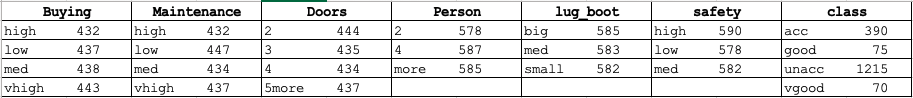

In [575]:
# -------------------------------------------------------------------
# Remplazamos los valores atipicos para las variables Doors y Persons
# de esta manera podermos ajustarlas a tipo entero (cualitativas).
# Tambien aprovechamos para mapear las variables categoricas en
# datos númericos y asi poder optimizar el modelo y aumentar la
# capacidad de predicción.
# -------------------------------------------------------------------

dataset.Doors.replace(('5more'),(5),inplace=True)
dataset.Person.replace(('more'),(5),inplace=True)
dataset.Buying.replace(('vhigh', 'high', 'med', 'low'), (3, 2, 1, 0), inplace = True)
dataset.Maintenance.replace(('vhigh', 'high', 'med', 'low'), (3, 2, 1, 0), inplace = True)
dataset.lug_boot.replace(('small','med','big'),(0,1,2),inplace=True)
dataset.safety.replace(('low','med','high'),(0,1,2),inplace=True)

In [576]:
# -------------------------------------------------------------------
# Validamos la existencia de registros duplicados para eliminar 
# registros redundates, para nuestro caso no se encontro ninguno.
# -------------------------------------------------------------------

dataset.drop_duplicates()
print(dataset.shape)

(1750, 7)


### Fase de ajuste de esquema y tipos de datos

In [577]:
dataset['Buying'] = dataset['Buying'].astype(str).astype(int)
dataset['Maintenance'] = dataset['Maintenance'].astype(str).astype(int)
dataset['lug_boot'] = dataset['lug_boot'].astype(str).astype(int)
dataset['safety'] = dataset['safety'].astype(str).astype(int)
dataset['Doors'] = dataset['Doors'].astype(str).astype(int)
dataset['Person'] = dataset['Person'].astype(str).astype(int)

dataset.loc[:, dataset.dtypes == 'object'] = dataset.select_dtypes(['object']).apply(lambda x: x.astype('category'))
dataset.dtypes                                                 

Buying            int64
Maintenance       int64
Doors             int64
Person            int64
lug_boot          int64
safety            int64
class          category
dtype: object

### Analisis distribución de los datos

In [578]:
# Lista variables cualitativas (Categóricos/Ordinales)
category_columns = list(dataset.select_dtypes(include=['category']).columns)

# Lista variables cuantitativas (Discretos/Continuos)
integer_columns = list(dataset.select_dtypes(include=['int64']).columns)

print(category_columns)
print(integer_columns)

['class']
['Buying', 'Maintenance', 'Doors', 'Person', 'lug_boot', 'safety']


Estadisticos y distribución de las variables cuantitativas

In [579]:
def imprimir_estadisticas(col_numericas, df):
    
    for col in col_numericas:
        
        col_act = df[col].tolist()
        
        print('{0} \n -media:{1} \n -mediana:{2} \n -moda:{3} \n -desviacion:{4} \n -var:{5} \n -percentil:{6}'.format(col,                                                                                                 
                      str(numpy.mean(col_act)),
                      str(numpy.median(col_act)),
                      str(stats.mode(col_act)),
                      str(numpy.std(col_act)),
                      str(numpy.var(col_act)),
                      str(numpy.percentile(col_act, 75))), '\n')
                      
imprimir_estadisticas(integer_columns, dataset)        

Buying 
 -media:1.5034285714285713 
 -mediana:1.5 
 -moda:ModeResult(mode=array([3]), count=array([443])) 
 -desviacion:1.1205813360092363 
 -var:1.2557025306122447 
 -percentil:3.0 

Maintenance 
 -media:1.4908571428571429 
 -mediana:1.0 
 -moda:ModeResult(mode=array([0]), count=array([447])) 
 -desviacion:1.1225872449163938 
 -var:1.2602021224489794 
 -percentil:2.0 

Doors 
 -media:3.4937142857142858 
 -mediana:3.0 
 -moda:ModeResult(mode=array([2]), count=array([444])) 
 -desviacion:1.121078780752299 
 -var:1.2568176326530613 
 -percentil:4.0 

Person 
 -media:3.673714285714286 
 -mediana:4.0 
 -moda:ModeResult(mode=array([4]), count=array([587])) 
 -desviacion:1.2445747081158416 
 -var:1.5489662040816325 
 -percentil:5.0 

lug_boot 
 -media:1.0017142857142858 
 -mediana:1.0 
 -moda:ModeResult(mode=array([2]), count=array([585])) 
 -desviacion:0.816611415595957 
 -var:0.6668542040816327 
 -percentil:2.0 

safety 
 -media:1.006857142857143 
 -mediana:1.0 
 -moda:ModeResult(mode=arra

Title. Distribución de datos en Buying


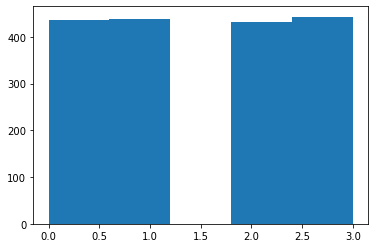

Title. Distribución de datos en Maintenance


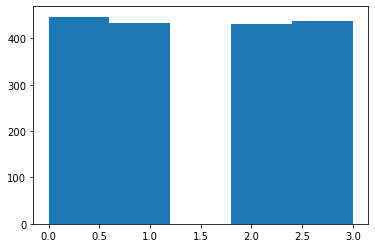

Title. Distribución de datos en Doors


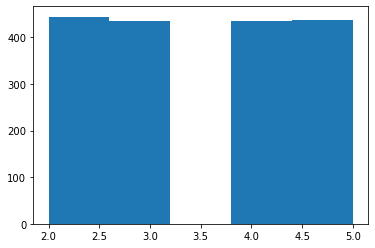

Title. Distribución de datos en Person


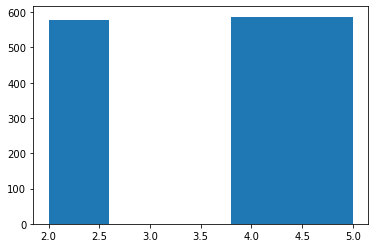

Title. Distribución de datos en lug_boot


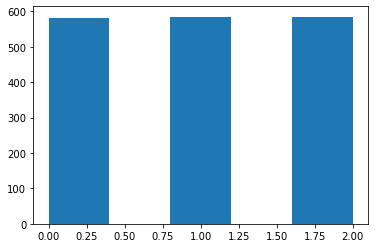

Title. Distribución de datos en safety


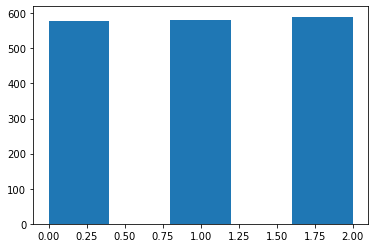

In [580]:
def graficar_histograma_cuantitativas(col_numericas, df):
    
    for col in col_numericas:
        
        print('Title. Distribución de datos en', col)
        data_person = list(df[col])
        plt.hist(data_person, 5)
        plt.show()
        
graficar_histograma_cuantitativas(integer_columns, dataset)

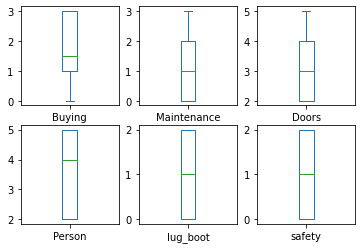

In [581]:
dataset.plot(kind='box',subplots=True, layout=(2,3), sharex=False, sharey=False)
pyplot.show()

Estadisticos y distribución de las variables cualitativas

Title. Distribución de datos en class


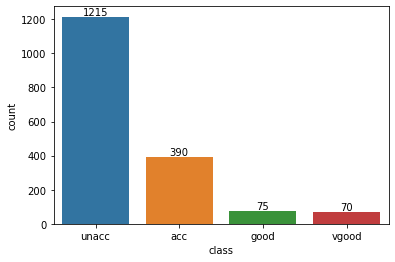

In [582]:
def graficar_histograma_cualitativas(col_cualitativas, df):
    
    for col in col_cualitativas:
        
        print('Title. Distribución de datos en', col)
        ax = sns.countplot(x=df[col],
                   order=df[col].value_counts(ascending=False).index)
        abs_values = df[col].value_counts(ascending=False).values
        ax.bar_label(container=ax.containers[0], labels=abs_values)
        
graficar_histograma_cualitativas(category_columns, dataset)

▸ Número de clases, indicando que representan dichas clases y el tipo de valor que toman:
 
 Tipos de valor cualitativo/categorico: De acuerdo a los a tributos de la instancia, indican
 los cuales indican la aceptabiliad o evaluación de un auto.

 1. Acceptable (acc)
 2. Good (good)
 3. Unacceptable (unacc)
 4. Very Good (vgood)
 
▸ Número de instancias en total: 1750

▸ Número de instancias pertenecientes a cada clase:

 * Acceptable(acc): 390
 * Good(good): 75
 * Unacceptable(unacc): 1275
 * Very Good(vgood): 70

▸ Número de atributos de entrada, su significado y tipo:

 * Buying - Precio de compra (alto, alto, medio, bajo)
 * Maintenance - Precio del mantenimiento (alto, alto, medio, bajo)
 * Doors - Número de puertas (2, 3, 4, 5 más)
 * Person - Capacidad de pasajeros (2, 4, más)
 * lug_boot - Tamaño del maletero (pequeño, mediano, grande)
 * safety - Seguridad del automóvil (baja, media, alta)

▸ ¿Hay algún valor de atributo desconocido? 
 * Si aquellos valores que tienen clasificación igual a  "5more" y "more"
   los cuales se asumen como el valor 5.

### Comparacón clase y atributos

In [583]:
features = dataset.iloc[:,:-1]
features[:5]
list_class =[]
for i in features:
    list_class.append(features[i].value_counts())   

In [584]:
buy = pd.crosstab(dataset['Buying'], dataset['class'])
mc = pd.crosstab(dataset['Maintenance'], dataset['class'])
drs = pd.crosstab(dataset['Doors'], dataset['class'])
prsn = pd.crosstab(dataset['Person'], dataset['class'])
lb = pd.crosstab(dataset['lug_boot'], dataset['class'])
sfty = pd.crosstab(dataset['safety'], dataset['class'])

list_attr = [{'Buying': buy, 'title' : 'Precio de venta vs Clasificación'},
             {'Maintenance': mc, 'title' : 'Precio de mantenimiento vs Clasificación'},
             {'Doors': mc, 'title' : 'Número de puertas vs Clasificación'},
             {'Person': prsn, 'title' : 'Capacidad de pasajeros vs Clasificación'},
             {'lug_boot': lb, 'title' : 'Tamaño del maletero vs Clasificación'},
             {'safety': sfty,'title' : 'Seguridad del automóvil vs Clasificación'}]

list_attr[0]['Buying']

class,acc,good,unacc,vgood
Buying,,,,
0,89,46,258,44
1,115,29,268,26
2,108,0,324,0
3,78,0,365,0


In [585]:
def graficar_rel_attrs_clase(list_attr, integer_columns):
        
    for idx, col in enumerate(integer_columns):
        attr_count = list_attr[idx][col]
        title = list_attr[idx]['title']

        data = [
            go.Bar(
                x = list_class[2].index, 
                y = attr_count['unacc'],
                name = 'Unacceptable'
            ),
            go.Bar(
                x = list_class[2].index,
                y = attr_count['acc'],
                name = 'Acceptable'
            ),
            go.Bar(
                x = list_class[2].index,
                y = attr_count['good'],
                name = 'Good'
            ),
            go.Bar(
                x = list_class[2].index,
                y = attr_count['vgood'],
                name = 'Very Good'
            )
        ]

        layout = go.Layout(
            barmode = 'stack',
            title = title
        )

        fig = go.Figure(data = data, layout = layout)
        py.iplot(fig, filename='cars_donut')


graficar_rel_attrs_clase(list_attr, integer_columns)    

##  Arbol de desición - CART indice GINI (Supervisado - Claificasión)

<b>Notas importantes:</b>

<p>
* Mientras usamos la ganancia de información como criterio, asumimos que los atributos son categóricos
y para el índice de Gini, se supone que los atributos son continuos. 
</p>  
    
<p>
* Otra medida de selección de atributos que utiliza CART (árboles categóricos y de regresión) es
    el <b>índice de Gini</b>. Utiliza el método Gini para crear puntos de división.
El índice de Gini se puede representar con la siguiente formula:
</p>   
</br>
<div style="position:relative;width:950px;height:100px;" align="left">
    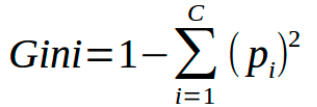
</div>
<spam>Aquí, nuevamente c es el número de clases y pi es la probabilidad asociada con la i-ésima clase.</spam>


### Split 80% - 20% (Entrenamiento y Pruebas)

Se usaran 80% de los datos para entrenar los algoritmos y un 20% de los datos para hacer
pruebas de predicción (Esta suele ser una proporción habitual cuando tenemos un considerable número de instancias o ejemplos a diferencia de la valiación crusada k-fold).

In [586]:
dataset.sample(5)

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
1553,0,1,2,5,2,0,unacc
1506,0,2,5,2,1,1,unacc
671,2,1,2,4,1,0,unacc
248,3,1,2,5,2,1,acc
1634,0,1,5,5,2,0,unacc


In [587]:
array = dataset.values

X = array[:,0:6]
y = array[:,6]

X_train,\
X_validation,\
Y_train,\
Y_validation = train_test_split(X,
                                y, 
                                test_size = 0.20, 
                                random_state = 1, 
                                shuffle = True) # Aleatorio

print(len(array)) # 1750
print(len(X)) # 1750
print(len(y)) # 1750
print(len(X_train)) # 1400
print(len(X_validation)) # 350
print(len(Y_train)) # 1400
print(len(Y_validation)) # 350

1750
1750
1750
1400
350
1400
350


In [588]:
print(X)

[[3 3 2 2 0 0]
 [3 3 2 2 0 1]
 [3 3 2 2 0 2]
 ...
 [0 0 5 5 2 0]
 [0 0 5 5 2 1]
 [0 0 5 5 2 2]]


In [589]:
print(y)

['unacc' 'unacc' 'unacc' ... 'unacc' 'good' 'vgood']


In [590]:
print(X_train.shape, X_validation.shape)

(1400, 6) (350, 6)


In [591]:
print(Y_train)

['acc' 'unacc' 'unacc' ... 'unacc' 'acc' 'unacc']


### Crear Modelo

In [592]:
# Espectativa: X_train
# Objetivo: Y_train     

model = DecisionTreeClassifier(criterion='gini',
                               #max_depth=3, 
                               random_state=0)
model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

### Visualizar Modelo

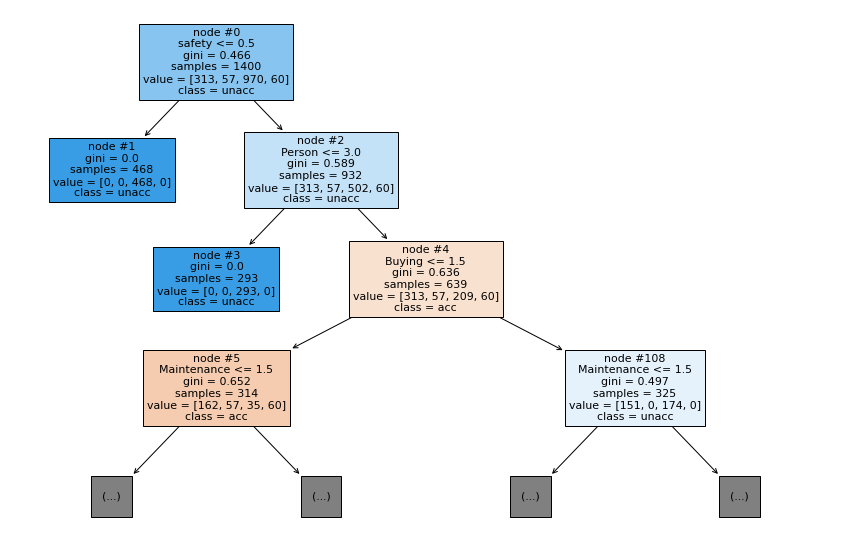

In [593]:
plt.figure(figsize = (15, 10))
plot_tree(decision_tree = model, 
          feature_names = integer_columns, 
          filled = True, 
          class_names = ['acc', 'good', 'unacc', 'vgood'],
          fontsize = 11,
          node_ids = True,
          max_depth = 3
         );

### Calcular Predicción

Predicción seguridad de un automovil con el indice GINI, utilizando en conjunto de pruba X_validation

In [594]:
y_pred_gini = model.predict(X_validation)

### Evaluar efectividad y rendimiento del modelo

<b>Matriz de confusión:</b> 

<p>Esta herramienta nos muestra un resumen del rendimiento del algoritmo de
clasificación, tambien podemos visualizar algunos errores. Por ultimo
muestra un resumen tabular con las predicciones correctas e incorrectas de cada categoría:

-Verdaderos positivos (TP): los verdaderos positivos ocurren cuando predecimos que una observación pertenece a una determinada clase y la observación realmente pertenece a esa clase.
    
-Verdaderos negativos (TN): los verdaderos negativos ocurren cuando predecimos que una observación no pertenece a una determinada clase y la observación en realidad no pertenece a esa clase.

-Falsos positivos (FP): los falsos positivos ocurren cuando predecimos que una observación pertenece a una determinada clase, pero la observación en realidad no pertenece a esa clase. Este tipo de error se denomina error de tipo I.

-Falsos negativos (FN): los falsos negativos ocurren cuando predecimos que una observación no pertenece a una determinada clase, pero la observación en realidad pertenece a esa clase. Este es un error muy grave y se denomina error de Tipo II.  
</p>
<b>NOTA:</b> 
<ol>   
    <li>Escenario ideal: 0 falsos positivos y 0 falsos negativos, tambien que la diagonal de la 
    matriz tenga valores maximos y el resto ceros.</li>
    <li>En la diagonal principal se encuentran las evaluaciones correctas (TP).</li>
    <li>TN, son el resto de valores de la clase diferentes al de la intersección en la diagonal.</li>
    <li>FP, Para identificarlos nos ubicamos en el eje x de las predicciones, seleccionamos la clase
       a evaluar y observamos todos los valores ubicados en el eje y diferentes al de la diagonal.</li>
    <li>FN, se efectua la misma operación del punto 4 pero cambiando los ejes.</li>
    <li>la suma de elementos de cada fila, es el total de elementos asociados al conjunto de datos
       de prueba de cada clase.</li>
    <li>4 clases = matris 4 x 4.</li>
</ol>  


<div style="position:relative;width:950px;height:170px;" align="left">
    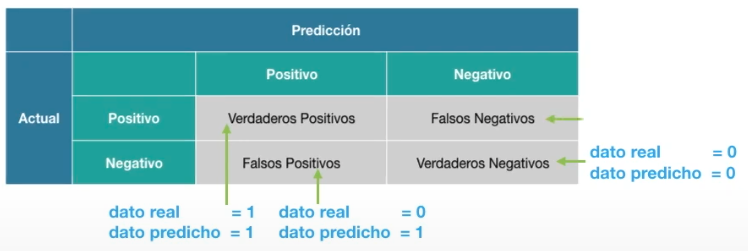
    <spam align="left">Imagen tomada de <a href="https://www.youtube.com/watch?v=r5WIImKV1XA&list=PLJjOveEiVE4Dk48EI7I-67PEleEC5nxc3&index=33">Canal YouTube 
(AprendeIA con Ligdi Gonzalez)
 </a></spam>
</div>

<div style="position:relative;width:950px;height:100px;" align="left">
    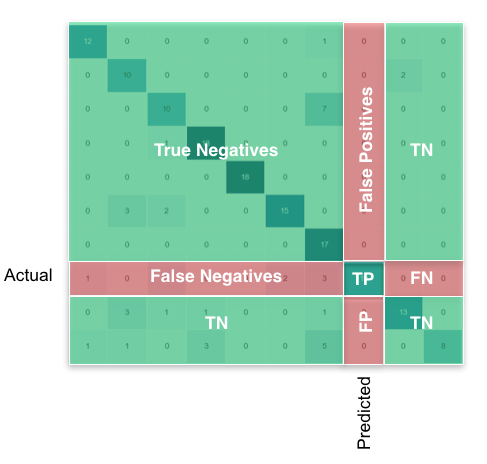
    <spam align="left">Imagen tomada de <a href="https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal">Stack overflow
 </a></spam>
</div>


In [595]:
cnf_matrix = confusion_matrix(Y_validation, 
                       y_pred_gini,
                       labels = ['acc', 'good', 'unacc', 'vgood'])


print(cnf_matrix)

[[ 73   3   1   0]
 [  0  18   0   0]
 [  2   1 242   0]
 [  0   0   0  10]]


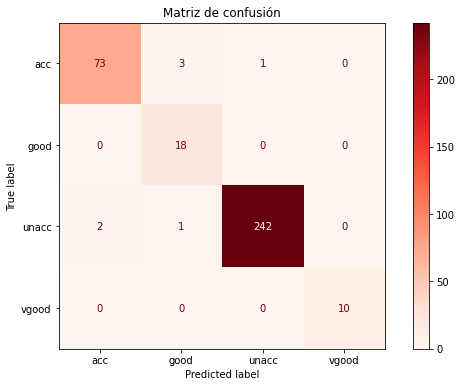

In [596]:
matrix = plot_confusion_matrix(model, X_validation, Y_validation, cmap=plt.cm.Reds)
matrix.ax_.set_title('Matriz de confusión')
plt.gcf().set_size_inches(10, 6)
plt.show()

In [597]:
np = numpy

FP = cnf_matrix.sum(axis = 0) - np.diag(cnf_matrix)
FN = cnf_matrix.sum(axis = 1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
# Specificity or true negative rate
TNR = TN / (TN + FP)
# Precision or positive predictive value
PPV = TP / (TP + FP)
# Negative predictive value
NPV = TN / (TN + FN)
# Fall out or false positive rate
FPR = FP / (FP + TN)
# False negative rate
FNR = FN / (TP + FN)
# False discovery rate
FDR = FP / (TP + FP)
# Overall accuracy
ACC = (TP + TN) / (TP + FP + FN + TN)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

print('clases: [acc, good, unacc, vgood]')
print('FP: {0}, FN: {1}, TP: {2}, TN: {3}'.format(FP, FN, TP, TN))
print('-'*40)
print('TPR (Sensitivity): {0}, AVG: {1}  \n'\
      'TNR (Specificity): {2}, AVG: {3}  \n'\
      'PPV (Positive pred): {4}, AVG: {5}  \n'\
      'NPV (Negative pred): {6}, AVG: {7}  \n'\
      'FPR (False positive rate): {8}, AVG: {9}  \n'\
      'FNR (False negative rate): {10}, AVG: {11}  \n'\
      'FDR (False discovery rate): {12}, AVG: {13}  \n'\
      'ACC (Overall accuracy): {14}, AVG: {15}'.format(TPR,
                                                       np.mean(TPR),
                                                       TNR, 
                                                       np.mean(TNR),
                                                       PPV, 
                                                       np.mean(PPV),
                                                       NPV, 
                                                       np.mean(NPV),
                                                       FPR, 
                                                       np.mean(FPR),
                                                       FNR,
                                                       np.mean(FNR),
                                                       FDR, 
                                                       np.mean(FDR),
                                                       ACC,
                                                       np.mean(ACC)))

clases: [acc, good, unacc, vgood]
FP: [2. 4. 1. 0.], FN: [4. 0. 3. 0.], TP: [ 73.  18. 242.  10.], TN: [271. 328. 104. 340.]
----------------------------------------
TPR (Sensitivity): [0.94805195 1.         0.9877551  1.        ], AVG: 0.983951762523191  
TNR (Specificity): [0.99267399 0.98795181 0.99047619 1.        ], AVG: 0.9927754975947747  
PPV (Positive pred): [0.97333333 0.81818182 0.99588477 1.        ], AVG: 0.9468499812944258  
NPV (Negative pred): [0.98545455 1.         0.97196262 1.        ], AVG: 0.9893542905692438  
FPR (False positive rate): [0.00732601 0.01204819 0.00952381 0.        ], AVG: 0.007224502405225297  
FNR (False negative rate): [0.05194805 0.         0.0122449  0.        ], AVG: 0.016048237476808905  
FDR (False discovery rate): [0.02666667 0.18181818 0.00411523 0.        ], AVG: 0.053150018705574266  
ACC (Overall accuracy): [0.98285714 0.98857143 0.98857143 1.        ], AVG: 0.99


### Medidas de precisión

<div style="position:relative;width:950px;height:170px;" align="left">
    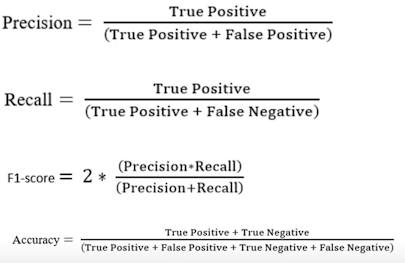
</div>

Se obtinene un reporte con las metricas de rendimiento del modelo, los resultados
muestran una presición y recall muy ceranos al maximo valor de 1 por lo cual tenemos
un modelo confiable y clasifica bien.

In [598]:
import warnings
warnings.filterwarnings('ignore')
print(metrics.classification_report(Y_validation, y_pred_gini, digits = 4))

              precision    recall  f1-score   support

         acc     0.9733    0.9481    0.9605        77
        good     0.8182    1.0000    0.9000        18
       unacc     0.9959    0.9878    0.9918       245
       vgood     1.0000    1.0000    1.0000        10

    accuracy                         0.9800       350
   macro avg     0.9468    0.9840    0.9631       350
weighted avg     0.9819    0.9800    0.9804       350



<b>Validación de la exactitud:</b> Con el indice GINI, nos indica la exactitud de la clasificación 
entre las predicciónes correctas y el numero total de predicciones.

<b>exactitud = VP + VN / (VP + FP + FN + VN)</b>

In [599]:
print(accuracy_score(Y_validation, y_pred_gini))

0.98


<b>Validación de la precisión:</b> Relación entre las predicciones correctas y el número total de predicciones
correctas previstas (Mide la precision del algoritmo a la hora de predecir casos positivos).

<b>presición = VP / (VP + FP)</b>

Nota: Se calcula por cada clase

In [600]:
print(precision_score(Y_validation, y_pred_gini, average='weighted'))

0.98190202554647


<b>Sensibilidad (Recall):</b> Relación entre predicciones positivas y el número total de predicciones positivas
              Tasa verdadera positiva.
              
<b>sensibilidad = VP / (VP + FN)</b>             
              
Nota: Se calcula por cada clase, el mejor valor es 1 y el peor valor es 0.           

In [601]:
recall_score(Y_validation, y_pred_gini, average='weighted')

0.98

Puntaje F1. Representa la sensibilidad y la presición

<b>F1 = (2 * precision * sensibilidad) / (precision+sensibilidad)</b>

In [602]:
print(f1_score(Y_validation, y_pred_gini, average='weighted'))

0.9804352274127944


In [603]:
print('Puntaje conjunto de entrenamiento: {:.4f}'.format(model.score(X_train, Y_train)))
print('Puntaje conjunto de validación: {:.4f}'.format(model.score(X_validation, Y_validation)))

# Son valores muy cercanos, por lo cual no hay signo de un sobreajuste del modelo

Puntaje conjunto de entrenamiento: 1.0000
Puntaje conjunto de validación: 0.9800


Curva de ROC (AUC - Area bajo la curva)

Nos dice que tan bueno puede distinguir el modelo entre 2 clases (si/no). Es ideal
que ambas curvas no se sobrepongan una a la otra (AUC = 0).

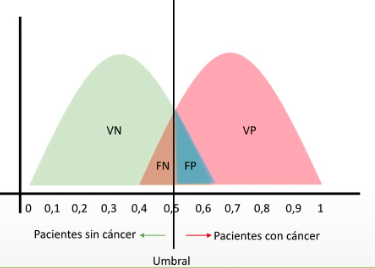

In [604]:
import random

rd_sample = random.choice(X_validation)
print(rd_sample)

[2 2 4 4 2 2]


<b>Mapeo categorias:</b>

<ol>
<li>Buying: ('vhigh', 'high', 'med', 'low'), (3, 2, 1, 0)</li>
<li>Maintenance: ('vhigh', 'high', 'med', 'low'), (3, 2, 1, 0)</li>
<li>Doors: 1,2,3,4,5</li>
<li>Person: 1,2,3,4,5</li>
<li>lug_boot: ('small','med','big'),(0,1,2)</li>
<li>safety: ('low','med','high'),(0,1,2)</li>
<li>class: Acceptable(acc),Good(good),Unacceptable(unacc),Very Good(vgood)</li>
</ol>
    
<div style="position:relative;
	left:0;
	height:120px;   
    ">
<br/>           
<b>Ejemplo: [3 0 4 4 1 0] = </b>
<br/>   
<br/>       
<table class="default" align="left">
  <tr>
    <td>Buying</td>
    <td>Maintenance</td>
    <td>Doors</td>
    <td>Person</td>
    <td>lug_boot</td>
    <td>safety</td>
  </tr>
  <tr>
    <td>vhigh</td>
    <td>low</td>
    <td>4</td>
    <td>4</td>
    <td>med</td>
    <td>low</td>
  </tr>
  <tr>
    <td>3</td>
    <td>0</td>
    <td>4</td>
    <td>4</td>
    <td>1</td>
    <td>0</td>
  </tr>
</table>
 </div>


<div style="position:relative;width:950px;height:170px;" align="left">
    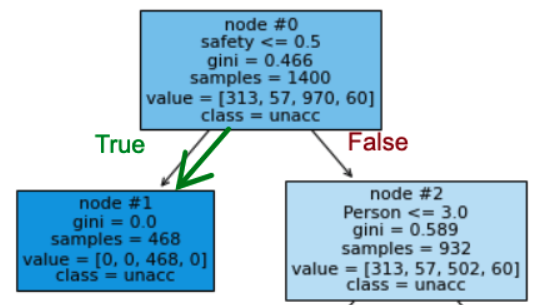
</div>
 <ol aling="left">
    <li>Acceptable(acc): 390</li>
    <li>Good(good): 75</li>
    <li>Unacceptable(unacc): 1275</li>
    <li>Very Good(vgood): 70</li>
</ol>
</br> 
<b>Hoja/Clase:</b>  unacc
</br> 

<p>
De las 1400 instancias seleccionadas al azar del dataset original (Shuffle = True) o ejemplos 468 tienen tienen las misma clase y caracteristicas que nuestra instancia Nro. 400 evaluada, la probabilidad de la instancia 400 evalue
el auto igual a inaceptable (unacc) es 468/468 = 1 (100%)    
</p>

In [605]:
df_val = dataset[(dataset.Buying == 3) & 
                (dataset.Maintenance == 0)& 
                (dataset.Doors == 4)& 
                (dataset.Person == 4)& 
                (dataset.lug_boot == 1)& 
                (dataset.safety == 0)]

df_val.head()

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
400,3,0,4,4,1,0,unacc


In [606]:
list_cls_unacc = list(filter(lambda c: c =='unacc', Y_train))
print(len(list_cls_unacc))

970


In [607]:
# Comprobando la predicción del modelo para la instancia Nro. 400, obtenemos el resultado
# de que la predicción de la evaluación de esta instancia es igual a 1 (100%) para la clase 'unacc'

df_val = df_val.drop(columns='class')
model.predict_proba(df_val)

array([[0., 0., 1., 0.]])

##  Arbol de desición - ID3 - Entropia (Supervisado - Claificasión)

In [608]:
model_entropy = DecisionTreeClassifier(criterion='entropy',                                        
                                       random_state=0)

model_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

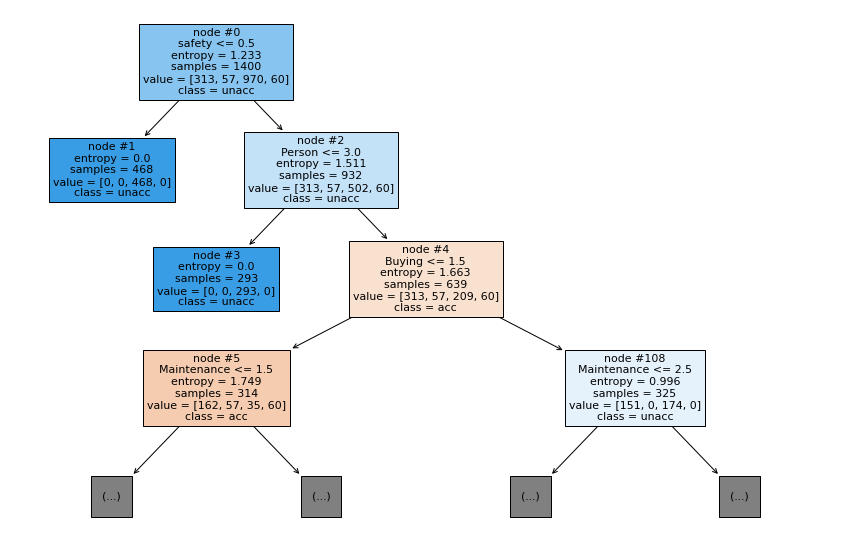

In [609]:
plt.figure(figsize = (15, 10))
plot_tree(decision_tree = model_entropy, 
          feature_names = integer_columns, 
          filled = True, 
          class_names = ['acc', 'good', 'unacc', 'vgood'],
          fontsize = 11,
          node_ids = True,
          max_depth = 3);

### Calcular Predicción

In [610]:
y_pred_entropy = model_entropy.predict(X_validation)

### Evaluar efectividad del modelo

In [611]:
cnf_matrix = confusion_matrix(Y_validation, 
                       y_pred_entropy,
                       labels = ['acc', 'good', 'unacc', 'vgood'])

print(cnf_matrix)

[[ 70   3   4   0]
 [  0  18   0   0]
 [  3   1 241   0]
 [  0   0   0  10]]


### Medidas de precisión

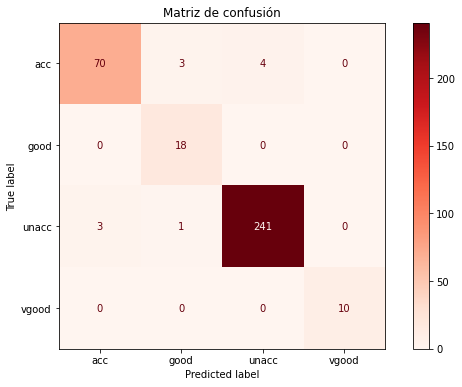

In [612]:
matrix = plot_confusion_matrix(model_entropy, X_validation, Y_validation, cmap=plt.cm.Reds)
matrix.ax_.set_title('Matriz de confusión')
plt.gcf().set_size_inches(10, 6)
plt.show()

In [613]:
np = numpy

FP = cnf_matrix.sum(axis = 0) - np.diag(cnf_matrix)
FN = cnf_matrix.sum(axis = 1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
# Specificity or true negative rate
TNR = TN / (TN + FP)
# Precision or positive predictive value
PPV = TP / (TP + FP)
# Negative predictive value
NPV = TN / (TN + FN)
# Fall out or false positive rate
FPR = FP / (FP + TN)
# False negative rate
FNR = FN / (TP + FN)
# False discovery rate
FDR = FP / (TP + FP)
# Overall accuracy
ACC = (TP + TN) / (TP + FP + FN + TN)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

print('clases: [acc, good, unacc, vgood]')
print('FP: {0}, FN: {1}, TP: {2}, TN: {3}'.format(FP, FN, TP, TN))
print('-'*40)
print('TPR (Sensitivity): {0}, AVG: {1}  \n'\
      'TNR (Specificity): {2}, AVG: {3}  \n'\
      'PPV (Positive pred): {4}, AVG: {5}  \n'\
      'NPV (Negative pred): {6}, AVG: {7}  \n'\
      'FPR (False positive rate): {8}, AVG: {9}  \n'\
      'FNR (False negative rate): {10}, AVG: {11}  \n'\
      'FDR (False discovery rate): {12}, AVG: {13}  \n'\
      'ACC (Overall accuracy): {14}, AVG: {15}'.format(TPR,
                                                       np.mean(TPR),
                                                       TNR, 
                                                       np.mean(TNR),
                                                       PPV, 
                                                       np.mean(PPV),
                                                       NPV, 
                                                       np.mean(NPV),
                                                       FPR, 
                                                       np.mean(FPR),
                                                       FNR,
                                                       np.mean(FNR),
                                                       FDR, 
                                                       np.mean(FDR),
                                                       ACC,
                                                       np.mean(ACC)))

clases: [acc, good, unacc, vgood]
FP: [3. 4. 4. 0.], FN: [7. 0. 4. 0.], TP: [ 70.  18. 241.  10.], TN: [270. 328. 101. 340.]
----------------------------------------
TPR (Sensitivity): [0.90909091 1.         0.98367347 1.        ], AVG: 0.973191094619666  
TNR (Specificity): [0.98901099 0.98795181 0.96190476 1.        ], AVG: 0.9847168895361667  
PPV (Positive pred): [0.95890411 0.81818182 0.98367347 1.        ], AVG: 0.9401898492896537  
NPV (Negative pred): [0.97472924 1.         0.96190476 1.        ], AVG: 0.9841585009455046  
FPR (False positive rate): [0.01098901 0.01204819 0.03809524 0.        ], AVG: 0.015283110463833356  
FNR (False negative rate): [0.09090909 0.         0.01632653 0.        ], AVG: 0.026808905380333953  
FDR (False discovery rate): [0.04109589 0.18181818 0.01632653 0.        ], AVG: 0.059810150710346406  
ACC (Overall accuracy): [0.97142857 0.98857143 0.97714286 1.        ], AVG: 0.9842857142857142


Reporte con las metricas de rendimiento del modelo, los resultados
muestran una presición y recall muy ceranos al maximo valor de 1 por lo cual tenemos
un modelo confiable y clasifica bien.

In [614]:
print(metrics.classification_report(Y_validation, y_pred_entropy, digits = 4))

              precision    recall  f1-score   support

         acc     0.9589    0.9091    0.9333        77
        good     0.8182    1.0000    0.9000        18
       unacc     0.9837    0.9837    0.9837       245
       vgood     1.0000    1.0000    1.0000        10

    accuracy                         0.9686       350
   macro avg     0.9402    0.9732    0.9543       350
weighted avg     0.9702    0.9686    0.9688       350



In [615]:
print('exactitud',     accuracy_score(Y_validation, y_pred_entropy))
print('presición',     precision_score(Y_validation, y_pred_entropy, average='weighted'))
print('sensibilidad',  recall_score(Y_validation, y_pred_entropy, average='weighted'))
print('f1',            f1_score(Y_validation, y_pred_entropy, average='weighted'))

exactitud 0.9685714285714285
presición 0.9701796833303683
sensibilidad 0.9685714285714285
f1 0.9687619047619047


In [616]:
print(accuracy_score(Y_validation, y_pred_entropy))

0.9685714285714285


### Validación cruzada estratificada de 10 veces (k-fold) 

Además, utilizaremos una validación cruzada estratificada de 10 veces (k-fold) para 
estimar la precisión del modelo y compararlo CART y ID3, aunque tengamos un número
de instancias considerables, vamos a probar los modelos mediante esta validación y asi
comparar los resultados obtenidos en el Split 80% - 20%

CART: 0.977857 (0.013344)
ID3: 0.980714 (0.012797)


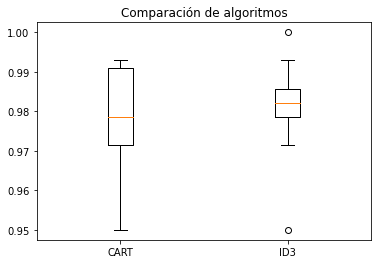

In [617]:
# Cargamos los algoritmos
models = []
models.append(('CART', DecisionTreeClassifier(criterion='gini', random_state=0)))
models.append(('ID3', DecisionTreeClassifier(criterion='entropy', random_state=0)))

# evaluamos cada modelo por turnos
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()
))

# Comparación de algoritmo
pyplot.boxplot(results, labels=names)
pyplot.title('Comparación de algoritmos')
pyplot.show()

* La gráfica compara la precisión de los modelos CART e ID3, los cuales tienen una precisión del 97% y 98%. Para extremos superiores de los bigotes están por encima del 99% Para CART y para ID3 se marca un valor de 100%, lo cual es normal ya que algunas pruebas o resultados de las predicciones de clasificación la precisión es del 100%. El cuartil inferior permanece por encima del 97% mientras que el de CART por encima del 95%.
* Todas las variables son importantes para los clientes a la hora de evaluar si el automóvil se encuentra en un rango aceptable o inaceptable.
* La seguridad y la capacidad de asientos son dos factores principales para rechazar los autos como inaceptables.
* El número de puertas es la variable menos importante para decidir el valor de clase del automóvil.

##  Random Forest - Ensable Learning (Supervisado - Claificasión)

### Calcular Predicción

En los métodos de aprendizaje integrado, la idea es unir un conjunto de
algoritmos ineficientes en los que cada uno colabora corrigiendo los
errores del resto del conjunto (Krawczyk et al., 2017). De esta manera, se
consigue una calidad general más alta que la de los mejores algoritmos
individuales que trabajan de forma aislada.

Actualmente, los métodos más modernos y maduros utilizados
para obtener los resultados más precisos en entornos de
producción, además de las redes neuronales, son los métodos
ensemble learning (https://www.datacamp.com/community/tutorials/random-forests-classifier-python).

1. Seleccione muestras aleatorias de un conjunto de datos determinado (80% Training and 20% test sets).
2. Construya un árbol de decisión para cada muestra y obtenga un resultado de predicción de cada árbol de decisión.
3. Realice una votación por cada resultado previsto.
4. Seleccione el resultado de la predicción con la mayor cantidad de votos como predicción final.

In [618]:
#Create a Gaussian Classifier
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                             max_depth=None, max_features='auto', max_leaf_nodes=None,
                             min_impurity_decrease=0.0, min_impurity_split=None,
                             min_samples_leaf=1, min_samples_split=2,
                             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                             oob_score=False, random_state=None, verbose=0,
                             warm_start=False)

clf.fit(X_train, Y_train)


# X_train,\
# X_validation,\
# Y_train,\
# Y_validation 

RandomForestClassifier(n_jobs=1)

### Evaluar efectividad del modelo

In [619]:
# Entrenar el modelo usando conjuntos entrenados y_pred_rf = clf.predict(X_validation)

y_pred_RF1 = clf.predict(X_validation)

In [620]:
print("Accuracy:", metrics.accuracy_score(Y_validation, y_pred_RF1))

Accuracy: 0.98


Hagamos una predicción para nuestro ejemplo aleatorio:

</br>
<div style="position:relative;
	left:0;
	height:120px;   
    ">
    
<b>Ejemplo: [3 0 4 4 1 0] = </b>
<br/>       
<table class="default" align="left">
  <tr>
    <td>Buying</td>
    <td>Maintenance</td>
    <td>Doors</td>
    <td>Person</td>
    <td>lug_boot</td>
    <td>safety</td>
  </tr>
  <tr>
    <td>vhigh</td>
    <td>low</td>
    <td>4</td>
    <td>4</td>
    <td>med</td>
    <td>low</td>
  </tr>
  <tr>
    <td>3</td>
    <td>0</td>
    <td>4</td>
    <td>4</td>
    <td>1</td>
    <td>0</td>
  </tr>
</table>
 </div>

In [621]:
clf.predict([[3, 0, 4, 4, 1, 0]])

array(['unacc'], dtype=object)

A continuación se consultará la importancia de la característica de cada variable del conjunto de datos del modelo
para ver las puntuaciones de importancia de la característica.

In [622]:
feature_imp = pd.Series(clf.feature_importances_,index = integer_columns).sort_values(ascending=False)
feature_imp

safety         0.296535
Person         0.231966
Buying         0.163762
Maintenance    0.161241
lug_boot       0.090095
Doors          0.056402
dtype: float64

Representemos los datos del resultado anterior graficamente

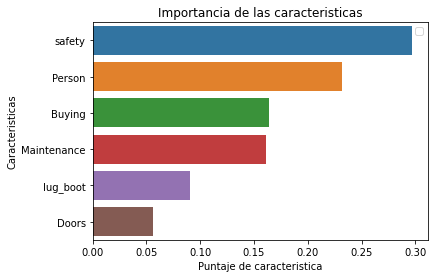

In [623]:
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Puntaje de caracteristica')
plt.ylabel('Caracteristicas')
plt.title("Importancia de las caracteristicas")
plt.legend()
plt.show()

Podriamos eliminar la caracteristica o el atributo "Doors" ya que califica con poca importancia.

In [624]:
dataset_RF = dataset
dataset_RF = dataset_RF.drop(['Doors'], axis = 1)

array = dataset_RF.values

X = array[:,0:5]
y = array[:,5]

X_train_RF,\
X_validation_RF,\
Y_train_RF,\
Y_validation_RF = train_test_split(X,
                                   y, 
                                   test_size = 0.20, 
                                   random_state = 1, 
                                   shuffle = True) # Arboles Aleatorio


Procedemos a crear un nuevo modelo ignorando la variable "Doors"

In [625]:
clf_RF = RandomForestClassifier(n_estimators=100)

clf_RF.fit(X_train_RF, Y_train_RF)

y_pred_RF2 = clf_RF.predict(X_validation_RF)

print("Accuracy:", metrics.accuracy_score(Y_validation_RF, y_pred_RF2))

Accuracy: 0.9428571428571428


Conclusión 1: 

podemos ver que la precisión no aumento (Modelo 1: 98%, modelo 2: 94%) a pesar de que eliminamos las variables menos importantes como el número de puertas "Doors", lo que nos indica que pribablemente no habian datos engañosos o que generaran ruido al modelo. Por otro lado el tiempo de entrenamiento debe ser menor ya que eliminamos una variable del modelo.

Tambien en el segundo modelo menos importante es lug_boot fue eliminado en las pruebas. 
pero se obtuvo como resultado que precisión era 85%, lo cual afecta a la precisión del modelo por lo cual tampoco es viable quitarla del modelo.

Se implemento una prueba adicional, en la cual no se elimina la variable "Door", pero se incrmenta el parametro de número de árboles a evaluar en el modelo n_estimators=2000, en la segunda instancia creada, se obtuvo una precisión
mayor a la del primer modelo, los valores son los siguientes:
    
1. Modelo 1, arboles 100, accuracy 94%
2. Modelo 2, arboles 2000, accuracy 97%

En el segundo modelo se sacrifica un poco el tiempo de generación y predicción del modelo, pero obtenemos un resultado
de precisión mejor al momento de clasificar las instancias.

nuestro modelo tiene una precisión muy buena, lo cual indica que realiza muy buen trabajo, par analizar un poco mas
la eficiencia de nuestro modelo, procederemos a validar los errores de nuestro algoritmo por medio de la matriz de confusión 

In [626]:
cnf_matrix = confusion_matrix(Y_validation, 
                              y_pred_RF1,
                              labels = ['acc', 'good', 'unacc', 'vgood'])

print(cnf_matrix)     

[[ 73   2   1   1]
 [  0  17   0   1]
 [  1   0 244   0]
 [  1   0   0   9]]


In [627]:
np = numpy

FP = cnf_matrix.sum(axis = 0) - np.diag(cnf_matrix)
FN = cnf_matrix.sum(axis = 1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
# Specificity or true negative rate
TNR = TN / (TN + FP)
# Precision or positive predictive value
PPV = TP / (TP + FP)
# Negative predictive value
NPV = TN / (TN + FN)
# Fall out or false positive rate
FPR = FP / (FP + TN)
# False negative rate
FNR = FN / (TP + FN)
# False discovery rate
FDR = FP / (TP + FP)
# Overall accuracy
ACC = (TP + TN) / (TP + FP + FN + TN)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

print('TPR (Sensitivity): {0}, AVG: {1}  \n'\
      'TNR (Specificity): {2}, AVG: {3}  \n'\
      'PPV (Positive pred): {4}, AVG: {5}  \n'\
      'NPV (Negative pred): {6}, AVG: {7}  \n'\
      'FPR (False positive rate): {8}, AVG: {9}  \n'\
      'FNR (False negative rate): {10}, AVG: {11}  \n'\
      'FDR (False discovery rate): {12}, AVG: {13}  \n'\
      'ACC (Overall accuracy): {14}, AVG: {15}'.format(TPR,
                                                       np.mean(TPR),
                                                       TNR, 
                                                       np.mean(TNR),
                                                       PPV, 
                                                       np.mean(PPV),
                                                       NPV, 
                                                       np.mean(NPV),
                                                       FPR, 
                                                       np.mean(FPR),
                                                       FNR,
                                                       np.mean(FNR),
                                                       FDR, 
                                                       np.mean(FDR),
                                                       ACC,
                                                       np.mean(ACC)))

TPR (Sensitivity): [0.94805195 0.94444444 0.99591837 0.9       ], AVG: 0.9471036899608328  
TNR (Specificity): [0.99267399 0.9939759  0.99047619 0.99411765], AVG: 0.9928109334558661  
PPV (Positive pred): [0.97333333 0.89473684 0.99591837 0.81818182], AVG: 0.9205425902418384  
NPV (Negative pred): [0.98545455 0.99697885 0.99047619 0.99705015], AVG: 0.9924899338467769  
FPR (False positive rate): [0.00732601 0.0060241  0.00952381 0.00588235], AVG: 0.0071890665441338725  
FNR (False negative rate): [0.05194805 0.05555556 0.00408163 0.1       ], AVG: 0.052896310039167185  
FDR (False discovery rate): [0.02666667 0.10526316 0.00408163 0.18181818], AVG: 0.07945740975816164  
ACC (Overall accuracy): [0.98285714 0.99142857 0.99428571 0.99142857], AVG: 0.99


Reporte de clasificación: Evalua el rendimiento del poder de clasificación del modelo, a traves de las metricas de 
    -Precisión
    -Recuperación
    -F1
    -Soporte del modelo    

### Medidas de precisión

In [628]:
print(classification_report(Y_validation, y_pred_RF1))

              precision    recall  f1-score   support

         acc       0.97      0.95      0.96        77
        good       0.89      0.94      0.92        18
       unacc       1.00      1.00      1.00       245
       vgood       0.82      0.90      0.86        10

    accuracy                           0.98       350
   macro avg       0.92      0.95      0.93       350
weighted avg       0.98      0.98      0.98       350



Conclusiones 2:
* Se construyeron 2 modelos con Random Forest, uno compuestop por 100 arboles y otro por 2000.
* Puntaje de los arboles obtenido se describio en las conclusiones 1.
* La seguridad es la caracteristica mas importante de este modelo y la menos importantes el número de puertas.
* Con la matriz de confusión podemos ver que hay muy pocos FP y FN en cada variable, por lo cual el modelo
 ofrece un buen rendimiento.

##  Reglas de clasificacion - PRISM (Supervisado - Claificasión)

<b>Reglas de asociacion:</b>
    
* Predicen valores de atributos,
combinaciones de valores de
atributos, o la propia clase.

* Descubrir combinaciones de
pares atributo-valor que ocurren
con cierta frecuencia.

<b>Reglas de clasificacion:</b>

* Predicen la clase.
* Clasificar futuras instancias.

<b>Medidas de evaluación de las reglas </b>

* Confianza = # Ex cumplen la regla / # de Ex cumplen antecedente
* Soporte = # Instancias cumple (Antecedente + Concecuente) / # Total de instancias
* p(consecuente de la regla) = consecuente / # Total Ex
* Lift = Confianza / p(consecuente de la regla)

<b>Nota 1:</b> Regla irrelavante, tiene confianza alta pero cubre pocos frecuentes (Confianza = 1, Soporte = 0,0001).

<b>Nota 2:</b>
* lift = 1 A es independiente de B
* lift > 1 correlación entre A y B > A probablemente implica B [regla útil]
* lift < 1 correlación negativa entre A y B > A probablemente implica ¬B

<b>Algoritmo PRISM</b> 

* Algoritmo de recubrimiento secuencial

* Aprendizaje de las reglas basado en la medida de <b>confianza</b>
(utilizada en el procedimiento <b>mejorRestriccion</b>)
*  Lógica del algoritmo:
1. Se escoge la regla más general (sin restricciones en el
antecedente)
2. Se selecciona la mejor restricción en base a la confianza
3. En caso de empate se escoge la restricción de mayor
cobertura (o mayor soporte)

Usaremos la libreria weka.classifiers.rules.Prism

<b>Requisitos</b>

* Python 3
* python-weka-wrapper (>= 0.2.0)
* JDK 1.8+ 
* https://fracpete.github.io/python-weka-wrapper/examples.html
* https://programtalk.com/vs2/python/2201/weka/weka/classifiers.py/
* https://fracpete.github.io/python-weka-wrapper3/weka.core.html
* https://www.cs.waikato.ac.nz/ml/weka/packageMetaDataTemporary/
* https://sourceforge.net/projects/weka/files/
* https://github.com/fracpete/python-weka-wrapper-examples

In [629]:
!pip install numpy
!pip install javabridge
!pip install python-javabridge
!pip install python-weka-wrapper3
!pip install weka
!pip install git+https://github.com/chrisspen/weka.git

  Cloning https://github.com/chrisspen/weka.git to /private/var/folders/p4/kcnrfr9n2rx7nrt7d02f8l880000gn/T/pip-req-build-cr0pxcb8
  Running command git clone -q https://github.com/chrisspen/weka.git /private/var/folders/p4/kcnrfr9n2rx7nrt7d02f8l880000gn/T/pip-req-build-cr0pxcb8
  Resolved https://github.com/chrisspen/weka.git to commit 24ce85b125fb425094f3668493790e457dcee1bb


In [630]:
import weka.core.jvm as jvm
import warnings

warnings.filterwarnings('ignore')
os.environ["JAVA_HOME"] = '/Library/Java/JavaVirtualMachines/jdk-17.0.1.jdk/Contents/Home'
os.environ["WEKA_JAR_PATH"] = '/usr/libexec/java_home'
jvm.start()
jvm.start(packages = True)

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/Users/juandavidescobarescobar/opt/anaconda3/lib/python3.9/site-packages/javabridge/jars/rhino-1.7R4.jar', '/Users/juandavidescobarescobar/opt/anaconda3/lib/python3.9/site-packages/javabridge/jars/runnablequeue.jar', '/Users/juandavidescobarescobar/opt/anaconda3/lib/python3.9/site-packages/javabridge/jars/cpython.jar', '/Users/juandavidescobarescobar/opt/anaconda3/lib/python3.9/site-packages/weka/lib/python-weka-wrapper.jar', '/Users/juandavidescobarescobar/opt/anaconda3/lib/python3.9/site-packages/weka/lib/weka.jar', '/Users/juandavidescobarescobar/opt/anaconda3/lib/python3.9/site-packages/weka/lib/simpleEducationalLearningSchemes.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled
INFO:weka.core.jvm:JVM already running, call jvm.stop() first


In [631]:
import weka.core.packages as packages

items = packages.installed_packages()
for item in items:
    print(item.name + " " + item.url)

simpleEducationalLearningSchemes http://prdownloads.sourceforge.net/weka/simpleEducationalLearningSchemes1.0.1.zip?download
userClassifier http://prdownloads.sourceforge.net/weka/userClassifier1.0.3.zip?download


In [632]:
packages.install_package("http://prdownloads.sourceforge.net/weka/simpleEducationalLearningSchemes1.0.1.zip?download", version="1.0.1")
packages.is_installed("simpleEducationalLearningSchemes") 
#Prism algorithm available = True

Failed to install http://prdownloads.sourceforge.net/weka/simpleEducationalLearningSchemes1.0.1.zip?download/1.0.1:
simpleEducationalLearningSchemes


java.lang.reflect.InaccessibleObjectException: Unable to make field private static final sun.net.www.protocol.jar.JarFileFactory sun.net.www.protocol.jar.JarURLConnection.factory accessible: module java.base does not "opens sun.net.www.protocol.jar" to unnamed module @1796cf6c
	at java.base/java.lang.reflect.AccessibleObject.checkCanSetAccessible(AccessibleObject.java:354)
	at java.base/java.lang.reflect.AccessibleObject.checkCanSetAccessible(AccessibleObject.java:297)
	at java.base/java.lang.reflect.Field.checkCanSetAccessible(Field.java:178)
	at java.base/java.lang.reflect.Field.setAccessible(Field.java:172)
	at weka.core.WekaPackageLibIsolatingClassLoader.getFieldObject(WekaPackageLibIsolatingClassLoader.java:681)
	at weka.core.WekaPackageLibIsolatingClassLoader.closeClassLoader(WekaPackageLibIsolatingClassLoader.java:749)
	at weka.core.WekaPackageClassLoaderManager.addPackageToClassLoader(WekaPackageClassLoaderManager.java:366)
	at weka.core.WekaPackageManager.initializeAndLoadUnof

True

In [633]:
# from weka.classifiers import Classifier
# #from weka.core.converters import Loader
# from weka.core.classes import Random

#loader = Loader(classname="weka.core.converters.CSVLoader")
# car_data = loader.load_file(nombre_data_set)
# car_data.class_is_last()

# build a classifier and output model
# print("Training PRISM classifier on Car Evaluation")
# classifier = Classifier(name="weka.classifiers.rules.Prism")
# y = classifier.predict(dataset)

# print(y)

In [634]:
# from weka.classifiers import Classifier
# # from weka.core.converters import Loader
# from weka.core.classes import Random


# loader = Loader(classname="weka.core.converters.CSVLoader")
# # car_data = loader.load_file(nombre_data_set)
# # car_data.class_is_last()

# build a classifier and output model
# print("Training PRISM classifier on Car Evaluation")
# classifier = Classifier(classname="weka.classifiers.rules.Prism")
# classifier.set_property("-c", "0.3")
# classifier.build_classifier(car_data)

# print(classifier.capabilities)
# print(classifier)

In [635]:
# evaluate model on test set
# print("Evaluating Prism classifier on Car Evaluation")
# evaluation = Evaluation(car_data)
# evl = evaluation.test_model(classifier, car_data)
# print(evl)
# print(evaluation.summary())

In [636]:
# evaluate model on train/test split
# print("Evaluating Prism classifier on Car Evaluation (random split 80%)")
# classifier = Classifier(classname="weka.classifiers.rules.Prism")
# classifier.set_property("-C", "0.3")
# evaluation = Evaluation(car_data)
# evaluation.evaluate_train_test_split(classifier, car_data, 80.0, Random(1))
# print(evaluation.summary())

In [637]:
jvm.stop()

###  Reglas de clasificacion - PRISM (Resultado Weka)

<p>Como primer paso homologaremos todas nuestras variables para que sean de tipo Categorico-Nominal, ya que 
el algoritmo Prism que usaremos solo puede tratar con atributos nominales. No puede lidiar con los valores
perdidos. No hace ninguna poda según su documentación 
<a href="https://www.dbs.ifi.lmu.de/~zimek/diplomathesis/implementations/EHNDs/doc/weka/classifiers/rules/Prism.html"><b>(Ver más)</b> </a>  </p>

### Preparar Weka Dataset

In [638]:
dataset = read_csv(nombre_data_set, sep=';', encoding=encoding, header='infer')

# 1. Convertimos valores númericos en nominales.
dataset.Person.replace(('2', '4', 'more'), ('two', 'four', 'five'),inplace=True)
dataset.Doors.replace(('2', '3', '4', '5more'), ('two', 'three', 'four', 'five'), inplace = True)

dataset['Buying'] = dataset['Buying'].astype(str)
dataset['Maintenance'] = dataset['Maintenance'].astype(str)
dataset['lug_boot'] = dataset['lug_boot'].astype(str)
dataset['safety'] = dataset['safety'].astype(str)
dataset['class'] = dataset['class'].astype(str)
dataset['Doors'] = dataset['Doors'].astype(str)
dataset['Person'] = dataset['Person'].astype(str)

# 2. Validadmos los tipos de datos.
dataset.info()

# 3. Generamos un nuevo dataset en formato CSV para ser leído desde la herramienta Weka
dataset.to_csv(path_or_buf="out.csv",
               sep=',',
               float_format=None,
               columns=['Buying', 'Maintenance', 'Doors', 'Person', 'lug_boot', 'safety', 'class'], 
               header=True,
               line_terminator='\n',
               index=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Buying       1750 non-null   object
 1   Maintenance  1750 non-null   object
 2   Doors        1750 non-null   object
 3   Person       1750 non-null   object
 4   lug_boot     1750 non-null   object
 5   safety       1750 non-null   object
 6   class        1750 non-null   object
dtypes: object(7)
memory usage: 95.8+ KB


### Cross-validation Folds = 10

=== Run information ===

Scheme:       weka.classifiers.rules.Prism 
Relation:     out
Instances:    1750
Attributes:   7
              Buying
              Maintenance
              Doors
              Person
              lug_boot
              safety
              class
Test mode:    10-fold cross-validation

=== Classifier model (full training set) ===

Prism rules:

If Person = two then unacc
If safety = low then unacc
If Maintenance = vhigh
   and Buying = vhigh then unacc
If Maintenance = vhigh
   and Buying = high then unacc
If Buying = vhigh
   and Maintenance = high then unacc
...

Time taken to build model: 0.04 seconds

=== Stratified cross-validation ===
=== Summary ===

Correctly Classified Instances        1582               90.4    %
Incorrectly Classified Instances        52                2.9714 %
Kappa statistic                          0.922 
Mean absolute error                      0.0159
Root mean squared error                  0.1261
Relative absolute error                  7.7327 %
Root relative squared error             40.5177 %
UnClassified Instances                 116                6.6286 %
Total Number of Instances             1750     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.999    0.014    0.995      0.999    0.997      0.989    0.994     0.995     unacc
                 0.940    0.023    0.902      0.940    0.921      0.902    0.853     0.717     acc
                 0.961    0.004    0.891      0.961    0.925      0.923    0.848     0.636     vgood
                 0.537    0.006    0.800      0.537    0.643      0.644    0.737     0.406     good
Weighted Avg.    0.968    0.015    0.967      0.968    0.966      0.957    0.952     0.908     

=== Confusion Matrix ===

    a    b    c    d   <-- classified as
 1213    1    0    0 |    a = unacc
    6  284    5    7 |    b = acc
    0    0   49    2 |    c = vgood
    0   30    1   36 |    d = good

### Split 80% - 20% (Entrenamiento y Pruebas)

=== Run information ===

Scheme:       weka.classifiers.rules.Prism 
Relation:     out
Instances:    1750
Attributes:   7
              Buying
              Maintenance
              Doors
              Person
              lug_boot
              safety
              class
Test mode:    split 80.0% train, remainder test

Time taken to build model: 0.05 seconds

=== Evaluation on test split ===

Time taken to test model on test split: 0 seconds

=== Summary ===

Correctly Classified Instances         309               88.2857 %
Incorrectly Classified Instances         7                2      %
Kappa statistic                          0.9448
Mean absolute error                      0.0111
Root mean squared error                  0.1052
Relative absolute error                  5.636  %
Root relative squared error             34.6665 %
UnClassified Instances                  34                9.7143 %
Total Number of Instances              350     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 1.000    0.013    0.996      1.000    0.998      0.992    0.993     0.994     unacc
                 0.946    0.012    0.946      0.946    0.946      0.935    0.826     0.704     acc
                 0.833    0.003    0.909      0.833    0.870      0.866    0.811     0.585     vgood
                 0.818    0.007    0.818      0.818    0.818      0.812    0.778     0.480     good
Weighted Avg.    0.978    0.012    0.978      0.978    0.978      0.970    0.949     0.910     

=== Confusion Matrix ===

   a   b   c   d   <-- classified as
 237   0   0   0 |   a = unacc
   1  53   0   2 |   b = acc
   0   2  10   0 |   c = vgood
   0   1   1   9 |   d = good

## Comparaciones

### Validación cruzada estratificada de 10 veces (k-fold) - COMPARACION

CART: 0.977857 (0.013344)
ID3: 0.980714 (0.012797)
RAND FOREST: 0.980714 (0.012797)


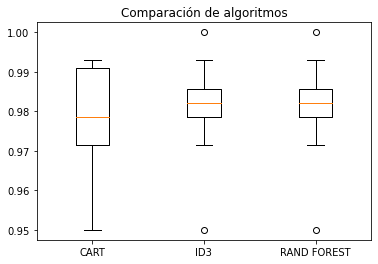

In [639]:
# Cargamos los algoritmos
models = []
models.append(('CART', DecisionTreeClassifier(criterion='gini', random_state=0)))
models.append(('ID3', DecisionTreeClassifier(criterion='entropy', random_state=0)))
models.append(('RAND FOREST', DecisionTreeClassifier(criterion='entropy', random_state=0)))

# evaluamos cada modelo por turnos
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()
))

# Comparación de algoritmo
pyplot.boxplot(results, labels=names)
pyplot.title('Comparación de algoritmos')
pyplot.show()

* Precision: Entre los que se predice que son correctos, la proporción era originalmente correcta (cuanto más grande, mejor, 1 es el estado ideal)

* recall：Entre los que originalmente eran correctos, la proporción predicha es correcta (cuanto más grande, mejor, 1 es el estado ideal)

* F-measure: La métrica F es una compensación entre la precisión y la recuperación (cuanto más grande, mejor, 1 es el estado ideal, en este momento la precisión es 1, la recuperación es 1)

* accuracy: La proporción de predicciones que son correctas (incluidos los dos casos en los que la predicción original es correcta y la predicción original es incorrecta) (cuanto más grande, mejor, 1 es el estado ideal)

* fp rate: La proporción de predicciones correctas que originalmente eran incorrectas (cuanto más pequeñas, mejor, 0 es el estado ideal)

* tp rate: La proporción de la predicción que originalmente era correcta es correcta (cuanto más grande, mejor, 1 es el estado ideal)



### CURVA ROC (AUC) - COMPARACION

CURVA ROC:

En la figura de ejemplo a continuación, la abscisa de la curva es la tasa de falsos positivos (FPR) y la ordenada es la tasa de verdaderos positivos (TPR).

Con la curva ROC, se puede derivar el significado de AUC: el área bajo la curva ROC (cuanto más grande, mejor, 1 es el estado ideal)

In [640]:
def graficar_curva_roc(y_test, y_prob_pred_cnb, title = 'Multiclass ROC curve'):
    
    fpr = {}
    tpr = {}
    thresh ={}
    n_class = 4

    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_cnb[:,i], pos_label=i)


    # plotting    
    plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='acc')
    plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='good')
    plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='unacc')
    plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='vgood')
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.savefig('Multiclass ROC',dpi=300);

0.9991332328709555


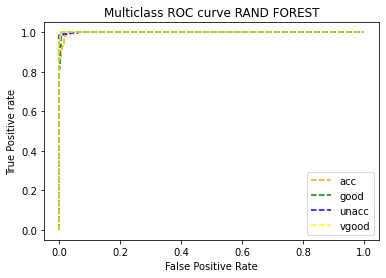

In [641]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

dataset = read_csv(nombre_data_set, sep=';', encoding=encoding, header='infer')
dataset.Doors.replace(('5more'),(5),inplace=True)
dataset.Person.replace(('more'),(5),inplace=True)
dataset.Buying.replace(('vhigh', 'high', 'med', 'low'), (3, 2, 1, 0), inplace = True)
dataset.Maintenance.replace(('vhigh', 'high', 'med', 'low'), (3, 2, 1, 0), inplace = True)
dataset.lug_boot.replace(('small','med','big'),(0,1,2),inplace=True)
dataset.safety.replace(('low','med','high'),(0,1,2),inplace=True)
dataset['class'].replace(('acc', 'good', 'unacc', 'vgood'),(0,1,2,3),inplace=True)

# Cargamos los algoritmos
models = []
models.append(('CART', DecisionTreeClassifier(criterion='gini', random_state=0)))
models.append(('ID3', DecisionTreeClassifier(criterion='entropy', random_state=0)))
models.append(('RAND FOREST', RandomForestClassifier(n_estimators = 2000) ))

#train and test split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('class', axis=1), dataset['class'], test_size=0.3, random_state=143)

name = models[2][0]
model = models[2][1]

#train the model
cnb = model
cnb.fit(X_train, y_train)

#predicting the data
y_pred_cnb = cnb.predict(X_test)
y_prob_pred_cnb = cnb.predict_proba(X_test)

#roc auc score
auc_sc = roc_auc_score(y_test, y_prob_pred_cnb, multi_class='ovo', average='weighted')
print(auc_sc)

graficar_curva_roc(y_test, y_prob_pred_cnb, title = 'Multiclass ROC curve ' + name)

<b>Fuentes bibliograficas de apoyo:</b>

* https://campusonline.unir.net/pluginfile.php/5417/mod_folder/content/0/Otro%20material/ML_Explorar%20%2B%20Visualizar.ipynb?forcedownload=1
* https://campusonline.unir.net/pluginfile.php/5417/mod_folder/content/0/Otro%20material/ML_A%CC%81rbol%20de%20decisio%CC%81n.ipynb?forcedownload=1
* https://campusonline.unir.net/mod/folder/view.php?id=3251#:~:text=MUAVDM_TIA_PER3370_Tema04.pdf
* https://campusonline.unir.net/pluginfile.php/5417/mod_folder/content/0/Presentaciones/MUAVDM_TIA_PER3370_Tema03.pdf?forcedownload=1
* https://cms.unir.net/ezpdf/generate/topic/295302
* https://cms.unir.net/ezpdf/generate/topic/296148
* https://cms.unir.net/ezpdf/generate/topic/308178
* https://rstudio-pubs-static.s3.amazonaws.com/118220_5a7997d6b0aa493c878d661968fc1f08.html.
* https://www.kaggle.com/retroflake/classification-of-car-s-acceptability.
* https://www.youtube.com/watch?v=0V4Eygf6rus.
* https://medium.com/data-science-practices/classification-of-car-evaluation-data-set-by-decision-tree-algorithm-rstudio-3a1c2fbe02c6.
* https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial.
* https://www.youtube.com/watch?v=TJJOz6thSfk&list=PLJjOveEiVE4Dk48EI7I-67PEleEC5nxc3&index=37.
* https://vitalflux.com/random-forest-classifier-python-code-example/
* https://learn.acloud.guru/search?query=Creating%20a%20scikit-learn%20Random%20Forest%20Classifier%20in%20AWS%20SageMaker&page=1
* https://www.kaggle.com/prashant111/random-forest-classifier-tutorial
* https://fracpete.github.io/python-weka-wrapper/examples.html
* https://programtalk.com/vs2/python/2201/weka/weka/classifiers.py/
* https://fracpete.github.io/python-weka-wrapper3/weka.core.html
* https://www.cs.waikato.ac.nz/ml/weka/packageMetaDataTemporary/
* https://sourceforge.net/projects/weka/files/
* https://www.futurelearn.com/info/courses/more-data-mining-with-weka/0/steps/29122
* https://es.wikipedia.org/wiki/Curva_ROC
* https://programmerclick.com/article/77801955644/

<b>Gracias!!</b>